In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#http://powderlin.es/api.html for api information
snow_api = 'http://api.powderlin.es/'
stations = requests.get(snow_api+'stations')

In [3]:
# Importing stations
df_stations = pd.DataFrame.from_records(stations.json())
num_stations = df_stations.shape[0]

# Removing location for clean up
location = df_stations['location']
df_stations = df_stations.drop(columns=['location'])
num_stations = df_stations.shape[0]

# Cleaning up location
lat = []
lng = []
for i in location:
    lat.append(i['lat'])
    lng.append(i['lng'])

# Concatonating to df_stations
df_stations['lat'] = lat 
df_stations['lng'] = lng

# Results
print(f'There are {num_stations} stations in database.')
df_stations.head(15)

There are 867 stations in database.


,elevation,name,timezone,triplet,wind,lat,lng
0,8777,BEAR RIVER RS,-7,992:UT:SNTL,False,40.88520,-110.82770
1,5130,PARADISE,-8,679:WA:SNTL,False,46.78265,-121.74765
2,4890,GERBER RESERVOIR,-8,945:OR:SNTL,False,42.20620,-121.13340
3,9820,GUNSIGHT PASS,-7,944:WY:SNTL,False,43.38332,-109.87815
4,10966,LAKEFORK BASIN,-7,567:UT:SNTL,False,40.73783,-110.62087
5,7850,BEAVER CREEK,-7,328:MT:SNTL,False,44.94966,-111.35852
6,8968,CAMP JACKSON,-7,383:UT:SNTL,False,37.81333,-109.48723
7,6780,PATTON MEADOWS AM,-8,1241:OR:SNTLT,False,42.24522,-120.60527
8,9105,SQUAW SPRINGS,-7,1156:UT:SNTL,False,38.49730,-112.00789
9,6720,PINE CREEK PASS,-7,695:ID:SNTL,False,43.56998,-111.21157


In [4]:
num_days = 100

# Total data
station_data = {}
for i in range(num_stations):

    if i == 15:
        break
    try: 
        # Grab individual site
        site = requests.get(snow_api + 'station/' + stations.json()[i]['triplet'], params={'days':num_days}).json() 

        # Extracting the data and storing it into a dataframe
        data = site['data']
        df_site = pd.DataFrame.from_records(data)

        # Storing individual site into a dictionary
        station_data[df_stations['name'][i]] = df_site
    except ValueError:

        # Don't store station if it throws a ValueError (JSONDecodeError in this case)
        print(f'Station: {df_stations["name"][i]} (Index: {i}) is no longer supported (Internal Server Error).')


Station: LAKEFORK BASIN (Index: 4) is no longer supported (Internal Server Error).


In [5]:
# Testing Individual Site
df_site = station_data['VACARRO SPRING']
df_site.head(10)

,Date,Snow Water Equivalent (in),Change In Snow Water Equivalent (in),Snow Depth (in),Change In Snow Depth (in),Observed Air Temperature (degrees farenheit)
0,2020-12-06,0.9,0.0,1,0,35
1,2020-12-07,0.9,0.0,1,0,31
2,2020-12-08,0.9,0.0,1,0,31
3,2020-12-09,0.9,0.0,1,0,39
4,2020-12-10,0.9,0.0,1,0,29
5,2020-12-11,0.9,0.0,1,0,29
6,2020-12-12,0.9,0.0,1,0,28
7,2020-12-13,1.0,0.1,6,5,11
8,2020-12-14,1.1,0.1,4,-2,24
9,2020-12-15,1.2,0.1,6,2,18


In [6]:
# Store features into their own dataframe
snow_water_equivalent = df_site['Snow Water Equivalent (in)']
change_snow_water_equivalent = df_site['Change In Snow Water Equivalent (in)']
snow_depth = df_site['Snow Depth (in)']
change_snow_depth = df_site['Change In Snow Depth (in)']
air_temp = df_site['Observed Air Temperature (degrees farenheit)']

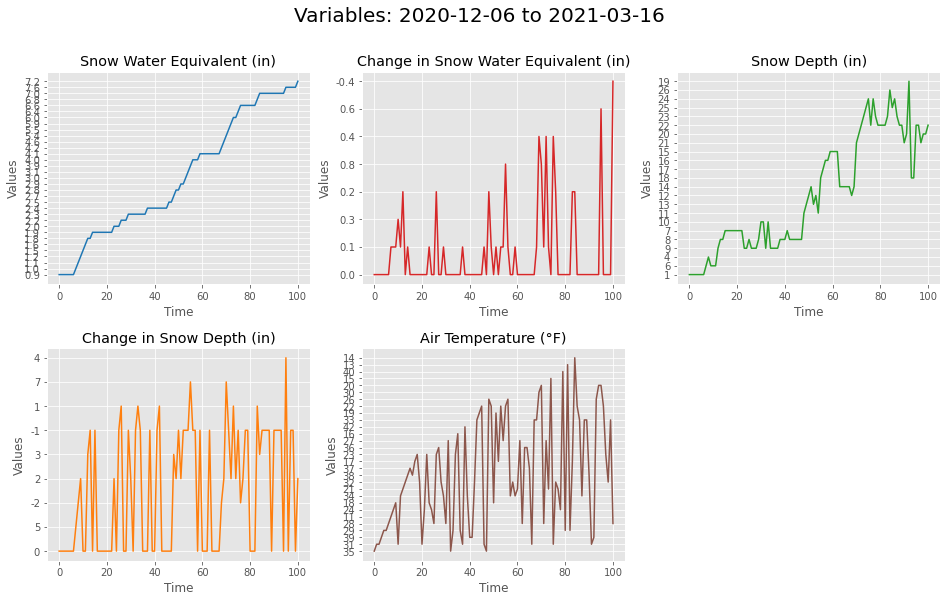

In [7]:
# Setting up figure
begin = df_site['Date'][0]
end = df_site['Date'][num_days]
fig, axs = plt.subplots(2, 3, figsize=(16,9))
fig.delaxes(axs[1,2])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
fig.suptitle('Variables: %s to %s' % (begin,end) , fontsize=20)

# Defining plot function
def plot(y, title, xlabel, ylabel, ax1, ax2, color):
    axs[ax1,ax2].plot(y, c=color)
    axs[ax1,ax2].set_xlabel(xlabel)
    axs[ax1,ax2].set_ylabel(ylabel)
    axs[ax1,ax2].set_title(title)

# Plotting variables    
plot(snow_water_equivalent, 'Snow Water Equivalent (in)', 'Time', 'Values', 0, 0, 'tab:blue')
plot(change_snow_water_equivalent, 'Change in Snow Water Equivalent (in)', 'Time', 'Values', 0, 1, 'tab:red')
plot(snow_depth, 'Snow Depth (in)', 'Time', 'Values', 0, 2, 'tab:green')
plot(change_snow_depth, 'Change in Snow Depth (in)', 'Time', 'Values', 1, 0, 'tab:orange')
plot(air_temp, 'Air Temperature (°F)', 'Time', 'Values', 1, 1, 'tab:brown')

# ====== To Do ======
# 1) change tick spacing to look better; putting dates on x axis does not look good either
# 2) Wrap our variables into an array so we can use add_subplot and a loop (removes redundant code)
